SIGNAL SHAPE: (800000,)


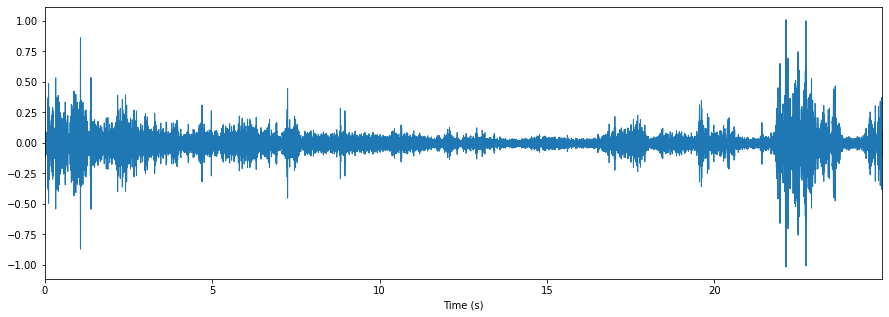

In [23]:
# Pick a file
audio_path = '../../input/birdclef-2021/train_soundscapes/28933_SSW_20170408.ogg'

# Listen to it
# import IPython.display as ipd
# ipd.Audio(audio_path)

import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

# Librosa is the most versatile audio library for Python 
# and uses FFMPEG to load and open audio files
# For more information visit: https://librosa.org/doc/latest/index.html
import librosa

# Load the first 15 seconds this file using librosa
sig, rate = librosa.load(audio_path, sr=32000, offset=525, duration=25)

# The result is a 1D numpy array that conatains audio samples. 
# Take a look at the shape (seconds * sample rate == 15 * 32000 == 480000)
print('SIGNAL SHAPE:', sig.shape)

import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(15, 5))
librosa.display.waveplot(sig, sr=32000, x_axis='s')

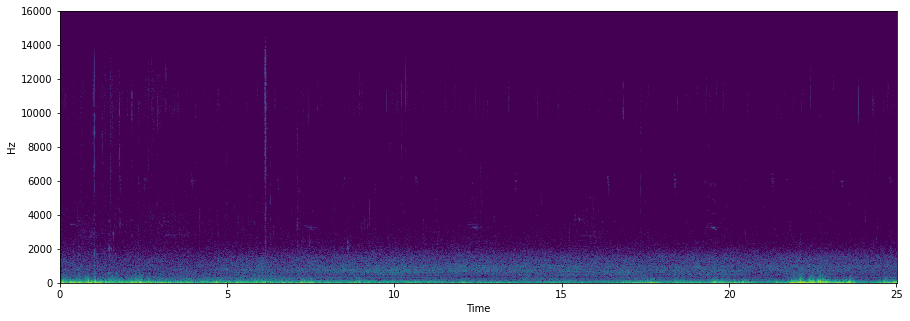

In [27]:
# First, compute the spectrogram using the "short-time Fourier transform" (stft)
spec = librosa.stft(sig)

# Scale the amplitudes according to the decibel scale
spec_db = librosa.amplitude_to_db(spec, ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(15, 5))
librosa.display.specshow(spec_db, 
                         sr=32000, 
                         x_axis='time', 
                         y_axis='hz', 
                         cmap=plt.get_cmap('viridis'))

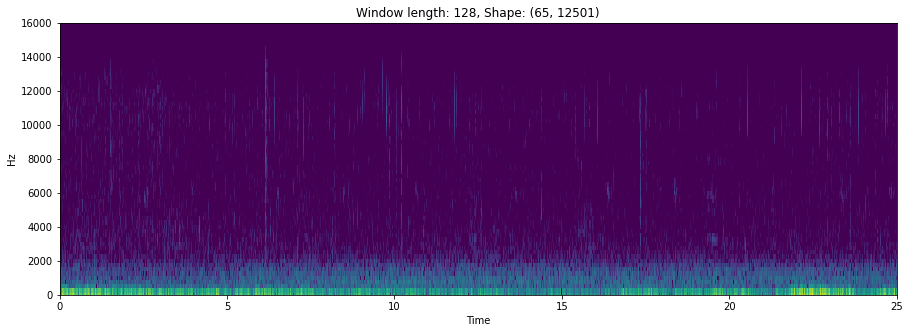

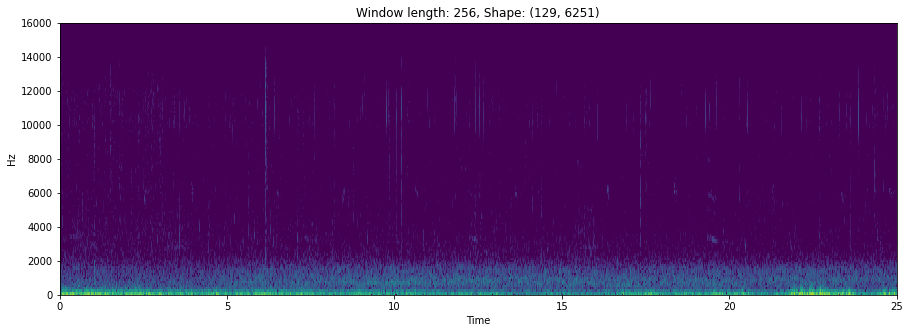

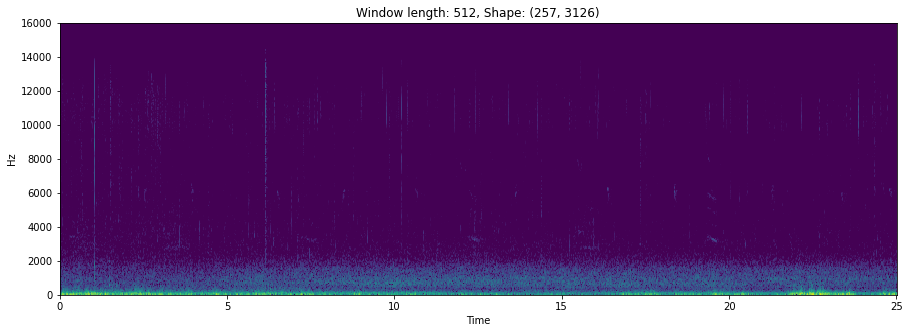

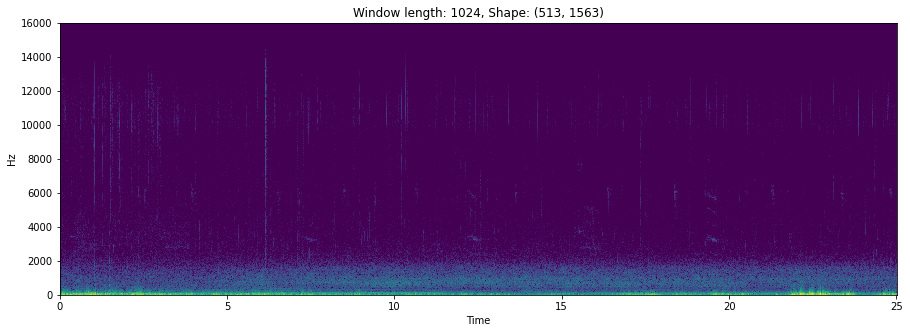

In [25]:
# Try a few window lengths (should be a power of 2)
for win_length in [128, 256, 512, 1024]:
    
    # We want 50% overlap between samples
    hop_length = win_length // 2
    
    # Compute spec (win_length implicity also sets n_fft and vice versa)
    spec = librosa.stft(sig, 
                        n_fft=win_length, 
                        hop_length=hop_length)
    
    # Scale to decibel scale
    spec_db = librosa.amplitude_to_db(spec, ref=np.max)
    
    # Show plot
    plt.figure(figsize=(15, 5))
    plt.title('Window length: ' + str(win_length) + ', Shape: ' + str(spec_db.shape))
    librosa.display.specshow(spec_db, 
                             sr=32000, 
                             hop_length=hop_length, 
                             x_axis='time', 
                             y_axis='hz', 
                             cmap=plt.get_cmap('viridis'))